<a href="https://colab.research.google.com/github/zackbatch/BA820-Project/blob/main/Priyanka_Chaudhari_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PLAY-BY-PLAY, PLAYER-BY-PLAYER – COLLEGE BASKETBALL ANALYTICS**

**Group 12 Team Members:**
Audrey Sellers,
Jaishankar Govindaraj,
Priyanka Chaudhari,
Varun Kaza,
Zack Batchelder

#Importing Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import gensim.downloader as api
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
#uploading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/zackbatch/BA820-Project/main/CollegeBasketballPlayers2009-2021.csv')
df

<ipython-input-2-310eda7333dd>:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/zackbatch/BA820-Project/main/CollegeBasketballPlayers2009-2021.csv')


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [ ]:
dftext = pd.read_csv("https://raw.githubusercontent.com/zackbatch/BA820-Project/main/Instant%20Analysis%20Draft%3B%202020-2021.csv")

# **Data Preparation**

##Preprocessing

In [ ]:
#renaming the column names
column_mapping = {
    'player_name': 'player_name',
    'team': 'team',
    'conf': 'conference',
    'GP': 'games_played',
    'Min_per': 'min_per',
    'Ortg': 'offensive_rating',
    'usg': 'usage',
    'eFG': 'effective_field_goal_%',
    'TS_per': 'true_shooting_%',
    'ORB_per': 'offensive_rebound_%',
    'DRB_per': 'defensive_rebound_%',
    'AST_per': 'assist_%',
    'TO_per': 'turnover_%',
    'FTM': 'free_throws_made',
    'FTA': 'free_throws_attempted',
    'FT_per': 'free_throws_%',
    'twoPM': '2-pointers_made',
    'twoPA': '2-pointers_attempted',
    'twoP_per': '2-pointers_%',
    'TPM': '3-pointers_made',
    'TPA': '3-pointers_attempted',
    'TP_per': '3-pointers_%',
    'blk_per': 'Block_%',
    'stl_per': 'Steal_%',
    'ftr': 'free_throw_rate',
    'yr': 'year_of_college',
    'ht': 'ht',
    'num': 'num',
    'porpag': 'Pointers_over_replacement_per_adjusted_game',
    'adjoe': 'Adjusted_offensive_efficiency',
    'pfr': 'pfr',
    'year': 'year',
    'pid': 'Player_ID_(recurring for each year)',
    'type': 'Type',
    'Rec Rank': 'Recruit_Rank',
    'ast/tov': 'Assist / Turnover ratio',
    'rimmade': 'Rim_shots_made',
    'rimmade+rimmiss': 'Rim-shots_attempted',
    'midmade': 'Midrange_shots_made',
    'midmade+midmiss': 'Midrange_shots_attempted',
    'rimmade/(rimmade+rimmiss)': 'Rim_shots %',
    'midmade/(midmade+midmiss)': 'Midrange_shots %',
    'dunksmade': 'Dunks_made',
    'dunksmiss+dunksmade': 'Dunks_attempted',
    'dunksmade/(dunksmade+dunksmiss)': 'Dunks %',
    'pick': 'Pick_drafted',
    'drtg': 'Defensive_rating',
    'adrtg': 'Adjusted_defensive_rating',
    'dporpag': 'Defensive_points_over_replacement_per_adjusted_game',
    'stops': 'Stops',
    'bpm': 'Box plus/minus',
    'obpm': 'Offensive box plus/minus',
    'dbpm': 'Defensive box plus/minus',
    'gbpm': 'gbpm',
    'mp': 'Minutes_played',
    'ogbpm': 'Offensive_gbpm',
    'dgbpm': 'Defensive_gbpm',
    'oreb': 'Offensive_rebounds',
    'dreb': 'Defensive_rebounds',
    'treb': 'Total_rebounds',
    'ast': 'Assists',
    'stl': 'Steals',
    'blk': 'Blocks',
    'pts': 'Points',
    'Unnamed: 64': 'Role/Position',
    'Unnamed: 65': 'Unnamed: 65'
}

df.rename(columns=column_mapping, inplace=True)


In [ ]:
#overview of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61061 entries, 0 to 61060
Data columns (total 66 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   player_name                                          61061 non-null  object 
 1   team                                                 61061 non-null  object 
 2   conference                                           61061 non-null  object 
 3   games_played                                         61061 non-null  int64  
 4   min_per                                              61061 non-null  float64
 5   offensive_rating                                     61061 non-null  float64
 6   usage                                                61061 non-null  float64
 7   effective_field_goal_%                               61061 non-null  float64
 8   true_shooting_%                                      61061 non-nul

In [ ]:
#checking for unique values in pick drafted
dfdraft = df.copy()
dfdraft = dfdraft[dfdraft['Pick_drafted'].notna()]
dfdraft['Player_ID_(recurring for each year)'].nunique()

630

**1. year_of_college**

In [ ]:
df['year_of_college'].unique()

array(['So', 'Sr', 'Jr', 'Fr', '0', nan, '57.1', '42.9', 'None'],
      dtype=object)

In [ ]:
#dropping year of college ~ 0.044% of the data being dropped
drop = ['None', '0', '57.1', '42.9']
df = df[~df['year_of_college'].isin(drop)]


In [ ]:
#checking for null values
df['year_of_college'].isna().sum()

274

In [ ]:
df.dropna(subset=['year_of_college'], inplace=True)


<ipython-input-9-ed5a7f58cfee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['year_of_college'], inplace=True)


**2. HT: Dropping the column since it does not provide any relevant player performance information**


In [ ]:
#dropping ht column since its not of relevance to us
df.drop(columns=['ht'], inplace=True)


<ipython-input-10-48fe64262b7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ht'], inplace=True)


**3. Num: Assuming it is the jersey number we decide to appoint jersey numbers for each team that have not been already taken**

In [ ]:
#checking for unique values in num column
df["num"].unique()

array([nan, '53', '5', '14', '22', '20', '34', '24', '54', '15', '13',
       '10', '21', '32', '12', '51', '31', '33', '1', '45', '50', '3',
       '23', '2', '4', '55', '35', '42', '25', '41', '52', '11', '40',
       '30', '43', '0', '44', '23B', 'None', '26', '99', '4A', '31/24',
       '--', 10.0, 22.0, 3.0, 23.0, 30.0, 13.0, 15.0, 1.0, 5.0, 35.0, 2.0,
       32.0, 11.0, 0.0, 40.0, 33.0, 4.0, 12.0, 20.0, 50.0, 25.0, 44.0,
       21.0, 31.0, 14.0, 34.0, 24.0, 55.0, 45.0, 52.0, 51.0, 41.0, 54.0,
       42.0, 43.0, 53.0], dtype=object)

In [ ]:
#replacing irregular values to nan
non_numeric_values = ['None', '--', '23B', '4A', '31/24']

df['num'] = df['num'].replace(non_numeric_values, np.nan)

# Check unique values again
print(df['num'].unique())


[nan '53' '5' '14' '22' '20' '34' '24' '54' '15' '13' '10' '21' '32' '12'
 '51' '31' '33' '1' '45' '50' '3' '23' '2' '4' '55' '35' '42' '25' '41'
 '52' '11' '40' '30' '43' '0' '44' '26' '99' 10.0 22.0 3.0 23.0 30.0 13.0
 15.0 1.0 5.0 35.0 2.0 32.0 11.0 0.0 40.0 33.0 4.0 12.0 20.0 50.0 25.0
 44.0 21.0 31.0 14.0 34.0 24.0 55.0 45.0 52.0 51.0 41.0 54.0 42.0 43.0
 53.0]


<ipython-input-12-b5e5f933b532>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = df['num'].replace(non_numeric_values, np.nan)


In [ ]:
#appoint jersey numbers for each team that have not been already taken
import numpy as np

# Fill null values in 'num' column with NaN
df['num'] = df['num'].fillna(np.nan)

# Group by team and fill null values with NaN if no numbers available
for team, group in df.groupby('team'):
    team_numbers = set(group['num'].dropna().unique())
    available_numbers = [num for num in range(1, 101) if num not in team_numbers]
    df.loc[group.index, 'num'] = group['num'].apply(lambda x: x if pd.notnull(x) else next(iter(available_numbers), np.nan))








<ipython-input-13-4a670511c9c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = df['num'].fillna(np.nan)


**4. Recruit Ranker**

In [ ]:
#replacing null values with 0 since not all players get ranked
df['Recruit_Rank'].isna().sum()
df['Recruit_Rank'].fillna(0, inplace=True)

<ipython-input-14-0781cde73ee0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recruit_Rank'].fillna(0, inplace=True)


**5. Assist / Turnover**

In [ ]:
#replacing null values for Assist / Turnover ratio with median
median = df['Assist / Turnover ratio'].median()
df['Assist / Turnover ratio'] = df['Assist / Turnover ratio'].fillna(median)



<ipython-input-15-0088ae74358d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Assist / Turnover ratio'] = df['Assist / Turnover ratio'].fillna(median)


**6. Searching for Nulls in Columns 46-64**

In [ ]:
#checking for null values for columns from 46 to 64
df[['Defensive_rating','Adjusted_defensive_rating', 'Defensive_points_over_replacement_per_adjusted_game', 'Stops','Box plus/minus','Offensive box plus/minus','Defensive box plus/minus','gbpm','Minutes_played','Offensive_gbpm','Defensive_gbpm','Offensive_rebounds','Defensive_rebounds','Total_rebounds','Assists','Steals','Blocks','Points']].isna().sum()

Defensive_rating                                       8
Adjusted_defensive_rating                              8
Defensive_points_over_replacement_per_adjusted_game    8
Stops                                                  8
Box plus/minus                                         8
Offensive box plus/minus                               8
Defensive box plus/minus                               8
gbpm                                                   8
Minutes_played                                         3
Offensive_gbpm                                         8
Defensive_gbpm                                         8
Offensive_rebounds                                     3
Defensive_rebounds                                     3
Total_rebounds                                         3
Assists                                                3
Steals                                                 3
Blocks                                                 3
Points                         

In [ ]:
#dropping the null values which accounts for less than 1% of the dataset
df.dropna(subset=['Defensive_rating','Adjusted_defensive_rating', 'Defensive_points_over_replacement_per_adjusted_game', 'Stops','Box plus/minus','Offensive box plus/minus','Defensive box plus/minus','gbpm','Minutes_played','Offensive_gbpm','Defensive_gbpm','Offensive_rebounds','Defensive_rebounds','Total_rebounds','Assists','Steals','Blocks','Points'], inplace=True)


<ipython-input-17-6d53ea9d9dee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Defensive_rating','Adjusted_defensive_rating', 'Defensive_points_over_replacement_per_adjusted_game', 'Stops','Box plus/minus','Offensive box plus/minus','Defensive box plus/minus','gbpm','Minutes_played','Offensive_gbpm','Defensive_gbpm','Offensive_rebounds','Defensive_rebounds','Total_rebounds','Assists','Steals','Blocks','Points'], inplace=True)


**6. Searching for Nulls in Columns 36-44**

In [ ]:
#checking for null values for columns 36 to 44
#these nulls are a significantly larger number than what we are used to
df[['Rim_shots_made','Rim-shots_attempted', 'Midrange_shots_made', 'Midrange_shots_attempted','Rim_shots %','Midrange_shots %','Dunks_made','Dunks_attempted','Dunks %']].isna().sum()

Rim_shots_made               6207
Rim-shots_attempted          6207
Midrange_shots_made          6207
Midrange_shots_attempted     6207
Rim_shots %                  9923
Midrange_shots %            10180
Dunks_made                   6207
Dunks_attempted              6207
Dunks %                     33214
dtype: int64

**7. Searching for unique values in the Object Columns**

In [ ]:
df['Role/Position'].unique()

array([nan, 'Combo G', 'Pure PG', 'Wing F', 'PF/C', 'Wing G', 'C',
       'Stretch 4', 'Scoring PG'], dtype=object)

In [ ]:
df['conference'].unique()

array(['SB', 'WAC', 'BE', 'WCC', 'BW', 'Horz', 'ind', 'A10', 'NEC', 'ACC',
       'SEC', 'AE', 'MAAC', 'Pat', 'SWAC', 'CAA', 'MVC', 'MAC', 'B12',
       'CUSA', 'P10', 'B10', 'SC', 'MEAC', 'Slnd', 'Ivy', 'Sum', 'ASun',
       'MWC', 'BSky', 'OVC', 'BSth', 'GWC', 'P12', 'Amer', 'Ind'],
      dtype=object)

In [ ]:
df['Type'].unique()

array(['all'], dtype=object)

We drop the column 'Unnamed: 65' as it can not be interpreted

In [ ]:
#dropping Unnamed: 65
df.drop(columns=['Unnamed: 65'], inplace=True)

<ipython-input-22-f266d864f9c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 65'], inplace=True)


**8. Observing patterns in the Nulls of the ``Role/Position`` column**

We temporarily create a DataFrame called 'dfrp' to observe any patterns in the rows of players with null values in the 'Role/Position' column.

In [ ]:
dfrp = df.copy()

In [ ]:
dfrp['Role/Position'].unique()

array([nan, 'Combo G', 'Pure PG', 'Wing F', 'PF/C', 'Wing G', 'C',
       'Stretch 4', 'Scoring PG'], dtype=object)

In [ ]:
dfrp = dfrp[dfrp['Role/Position'].isna()]

In [ ]:
dfrp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4596 entries, 0 to 59476
Data columns (total 64 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   player_name                                          4596 non-null   object 
 1   team                                                 4596 non-null   object 
 2   conference                                           4596 non-null   object 
 3   games_played                                         4596 non-null   int64  
 4   min_per                                              4596 non-null   float64
 5   offensive_rating                                     4596 non-null   float64
 6   usage                                                4596 non-null   float64
 7   effective_field_goal_%                               4596 non-null   float64
 8   true_shooting_%                                      4596 non-null 

We notice that most nulls are in the column indexes from 35-43.

We drop the nulls from the 'Role/Position' by omitting their values in the below code block

In [ ]:
df = df[df['Role/Position'].isin( ['Combo G', 'Pure PG', 'Wing F', 'PF/C', 'Wing G', 'C', 'Stretch 4', 'Scoring PG'])]

**9. Observing patterns in the Nulls of the columns**

``Rim_shots_made``

``Rim-shots_attempted``

``Midrange_shots_made``

``Midrange_shots_attempted``

``Rim_shots %``

``Midrange_shots %``

``Dunks_made``

``Dunks_attempted``

``Dunks %'``


We decide to observe patterns in the missing values. We create a temporary dataframe called 'dfpractice'.

In [ ]:
dfpractice = df[['Rim_shots_made',
'Rim-shots_attempted',
'Midrange_shots_made',
'Midrange_shots_attempted',
'Rim_shots %',
'Midrange_shots %',
'Dunks_made',
'Dunks_attempted',
'Dunks %']             ]

In [ ]:
dfpracticetwo = dfpractice.copy()

'Dunks_made' is our test column. We subset the null values to see if certain values are consistently missing.

In [ ]:
dfpractice = dfpracticetwo[dfpracticetwo['Dunks_made'].isna()]

In [ ]:
dfpractice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 4592 to 61060
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rim_shots_made            0 non-null      float64
 1   Rim-shots_attempted       0 non-null      float64
 2   Midrange_shots_made       0 non-null      float64
 3   Midrange_shots_attempted  0 non-null      float64
 4   Rim_shots %               0 non-null      float64
 5   Midrange_shots %          0 non-null      float64
 6   Dunks_made                0 non-null      float64
 7   Dunks_attempted           0 non-null      float64
 8   Dunks %                   0 non-null      float64
dtypes: float64(9)
memory usage: 126.2 KB


We use the 'Rim_shots_made','Rim-shots_attempted', 'Rim_shots %' columns to observe the relationship between the absolute values and the percentage columns of the same performance metric. This relationship is found for:-

1. 'Rim_shots_made', 'Rim-shots_attempted', 'Rim_shots %'

2. 'Midrange_shots_made', 'Midrange_shots_attempted', 'Midrange_shots %'

3. 'Dunks_made', 'Dunks_attempted', 'Dunks %'

In [ ]:
dfrim = df[['Rim_shots_made','Rim-shots_attempted', 'Rim_shots %']]

In [ ]:
dfrim['rimdivided'] = dfrim['Rim_shots_made'] / dfrim['Rim-shots_attempted']

<ipython-input-33-593775140539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrim['rimdivided'] = dfrim['Rim_shots_made'] / dfrim['Rim-shots_attempted']


In [ ]:
dfrim

,Rim_shots_made,Rim-shots_attempted,Rim_shots %,rimdivided
4589,48.0,75.0,0.6400,0.64000
4590,0.0,0.0,NaN,NaN
4591,82.0,134.0,0.6119,0.61194
4592,NaN,NaN,NaN,NaN
4593,NaN,NaN,NaN,NaN
...,...,...,...,...
61056,NaN,NaN,NaN,NaN
61057,0.0,0.0,NaN,NaN
61058,NaN,NaN,NaN,NaN
61059,NaN,NaN,NaN,NaN


In [ ]:
df = df[~df[['Rim_shots_made','Rim-shots_attempted','Midrange_shots_made','Midrange_shots_attempted','Dunks_made','Dunks_attempted']].isna().any(axis=1)]

**10. Treatment of columns**

We fill the columns below with 0.

In [ ]:
df[['Rim_shots %', 'Midrange_shots %', 'Dunks %']] = df[['Rim_shots %', 'Midrange_shots %', 'Dunks %']].fillna(0)

<ipython-input-36-08c811721aaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Rim_shots %', 'Midrange_shots %', 'Dunks %']] = df[['Rim_shots %', 'Midrange_shots %', 'Dunks %']].fillna(0)


we drop the 'Type' and 'num' values after seeing that they do not reflect either performance or tell us anything about the player that is not arbitrary



In [ ]:
df.drop(['Type', 'num'], axis=1, inplace=True)


<ipython-input-37-f106f7f539ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Type', 'num'], axis=1, inplace=True)


**11. Finding the unique player values**

In [ ]:
df['player_name'].duplicated().sum()

31292

The below code tells us that there are only 23230 unique players in the dataset.

In [ ]:
df['player_name'].nunique()

23247

In [ ]:
df['Player_ID_(recurring for each year)'].nunique()

23230

**12. Subsetting Performance and Player Detail Columns**

We subset the performance metrics of players below.

In [ ]:
performancecolumns = [
    'Assist / Turnover ratio',
    'Rim_shots_made',
    'Rim-shots_attempted',
    'Midrange_shots_made',
    'Midrange_shots_attempted',
    'Rim_shots %',
    'Midrange_shots %',
    'Dunks_made',
    'Dunks_attempted',
    'Dunks %',
    'Defensive_rating',
    'Adjusted_defensive_rating',
    'Defensive_points_over_replacement_per_adjusted_game',
    'Stops',
    'Box plus/minus',
    'Offensive box plus/minus',
    'Defensive box plus/minus',
    'gbpm',
    'Minutes_played',
    'Offensive_gbpm',
    'Defensive_gbpm',
    'Offensive_rebounds',
    'Defensive_rebounds',
    'Total_rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Points',
    'Pointers_over_replacement_per_adjusted_game',
    'Adjusted_offensive_efficiency',
    'pfr',
    'games_played',
    'min_per',
    'offensive_rating',
    'usage',
    'effective_field_goal_%',
    'true_shooting_%',
    'offensive_rebound_%',
    'defensive_rebound_%',
    'assist_%',
    'turnover_%',
    'free_throws_made',
    'free_throws_attempted',
    'free_throws_%',
    '2-pointers_made',
    '2-pointers_attempted',
    '2-pointers_%',
    '3-pointers_made',
    '3-pointers_attempted',
    '3-pointers_%',
    'Block_%',
    'Steal_%',
    'free_throw_rate'
]

We make a list of the columns that give us player details. We use the first occurring instance of each column.

In [ ]:
newdfplayerdetails = ['player_name','team','conference','Role/Position','year_of_college','year','Recruit_Rank','Role/Position','Pick_drafted']

**13. Creating the cleaned DataFrame**

In [ ]:
agg_dict = {**dict.fromkeys(performancecolumns, 'mean'), **dict.fromkeys(newdfplayerdetails, 'first')}

In [ ]:
newdf = df.groupby('Player_ID_(recurring for each year)').agg(agg_dict).reset_index()

In [ ]:
newdf = newdf.iloc[:,[54,55,56,57,58,59,60,61,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,\
              35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53]]

In [ ]:
newdf = newdf.drop(['player_name', 'team','conference','Role/Position','year_of_college','year','Player_ID_(recurring for each year)'], axis=1)

In [ ]:
newdf['Pick_drafted'].isnull().sum()

22648

**14. Creating a new column in this DataFrame based on the whether the player was drafted**

Create column so that null values convert to 0 meaning they were not drafted to the NBA, and 1 means they were drafted to the NBA.

In [ ]:
# Audrey
# add column that makes the values for the 'pick_drafted' columnn either 1 or 0
# in order to see which players got drafted and did not get drafted
newdf['Pick_drafted_binary'] = newdf['Pick_drafted'].apply(lambda x: 1 if x > 0 else 0)
newdf['Pick_drafted_binary']

0        0
1        0
2        0
3        0
4        0
        ..
23225    0
23226    0
23227    0
23228    0
23229    0
Name: Pick_drafted_binary, Length: 23230, dtype: int64

In [ ]:
# Audrey
# confirm that the values for this column are 1 or 0

newdf['Pick_drafted_binary'].unique()

array([0, 1])

In [ ]:
# Audrey
# confirm there are no null values in this new column

newdf['Pick_drafted_binary'].isnull().sum()

0

In [ ]:
# Audrey
# creating a dataframe for tsne analysis later in the notebook
tsne_df= newdf.copy()

In [ ]:
dropped_variable = newdf['Pick_drafted_binary']
newdf.drop(columns=['Pick_drafted'], inplace=True)
df_numeric_corrected = newdf.drop(columns=['Pick_drafted_binary'], inplace=True)

**15. Standardizing the dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

df_numeric_corrected = pd.DataFrame(scaler.fit_transform(newdf), columns = newdf.columns)
df_numeric_corrected

,Recruit_Rank,Assist / Turnover ratio,Rim_shots_made,Rim-shots_attempted,Midrange_shots_made,Midrange_shots_attempted,Rim_shots %,Midrange_shots %,Dunks_made,Dunks_attempted,...,free_throws_%,2-pointers_made,2-pointers_attempted,2-pointers_%,3-pointers_made,3-pointers_attempted,3-pointers_%,Block_%,Steal_%,free_throw_rate
0,-0.511823,-0.225693,-0.878499,-0.927879,-0.624299,-0.665218,-0.016684,0.263490,-0.473684,-0.486054,...,-0.269399,-0.848636,-0.859841,-0.350109,-0.530233,-0.448102,-0.018031,-0.241000,-0.741307,-0.487379
1,-0.511823,1.518933,0.573016,0.609521,0.335382,0.544778,0.374184,0.122736,0.376182,0.418105,...,0.423914,0.521472,0.616515,0.179030,1.563417,1.518213,0.805446,-0.156779,-0.428887,-0.318277
2,-0.511823,0.163983,-0.916697,-0.976301,-0.822854,-0.871175,-2.241316,-1.675079,-0.473684,-0.486054,...,-2.267416,-0.953025,-0.993448,-2.399112,-0.638994,-0.747541,2.562583,-0.241000,-0.968521,-1.070782
3,-0.511823,-0.218016,2.215521,2.267977,2.089280,2.372644,0.481189,0.340265,-0.048751,0.030608,...,0.361975,2.335234,2.480332,0.319758,1.046802,1.009167,0.799647,-0.059601,-0.173271,0.425772
4,-0.396954,0.738836,0.878598,0.912159,0.434659,0.596267,0.439811,0.230337,1.367692,1.451429,...,0.457880,0.743299,0.810245,0.291612,2.460695,1.687895,1.431752,-0.059601,0.792390,0.084750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23225,2.726053,-0.891474,-0.496522,-0.588925,-0.558114,-0.665218,0.817553,0.909680,0.092893,0.030608,...,-0.936736,-0.561566,-0.672792,0.978366,-0.747755,-0.807428,-1.305438,-0.033686,-0.514092,0.282036
23226,-0.511823,0.163983,-0.840301,-0.927879,-0.822854,-0.871175,2.207948,-1.675079,-0.473684,-0.486054,...,-2.267416,-0.900831,-0.966727,1.355518,-0.693375,-0.767503,1.594128,-0.241000,2.553302,0.056566
23227,-0.511823,-1.524859,-0.916697,-0.976301,-0.822854,-0.896920,-2.241316,-1.675079,-0.473684,-0.486054,...,-2.267416,-0.953025,-1.006809,-2.399112,-0.747755,-0.787466,-1.305438,-0.241000,-0.968521,-1.070782
23228,1.175319,-1.524859,-0.916697,-0.976301,-0.822854,-0.896920,-2.241316,-1.675079,-0.473684,-0.486054,...,-0.269399,-0.953025,-1.006809,-2.399112,-0.747755,-0.807428,-1.305438,-0.241000,-0.968521,-1.070782


In [ ]:
df_numeric_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23230 entries, 0 to 23229
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Recruit_Rank                                         23230 non-null  float64
 1   Assist / Turnover ratio                              23230 non-null  float64
 2   Rim_shots_made                                       23230 non-null  float64
 3   Rim-shots_attempted                                  23230 non-null  float64
 4   Midrange_shots_made                                  23230 non-null  float64
 5   Midrange_shots_attempted                             23230 non-null  float64
 6   Rim_shots %                                          23230 non-null  float64
 7   Midrange_shots %                                     23230 non-null  float64
 8   Dunks_made                                           23230 non-nul

# **PCA**

In [ ]:
#performing PCA on numeric data to reduce dimensionality
from sklearn.decomposition import PCA
pca_model = PCA()

pca_model.fit(df_numeric_corrected)
transformed_data = pca_model.transform(df_numeric_corrected)

pca_model.components_.shape
df_components = pd.DataFrame(pca_model.components_, columns = df_numeric_corrected.columns)
df_components

,Recruit_Rank,Assist / Turnover ratio,Rim_shots_made,Rim-shots_attempted,Midrange_shots_made,Midrange_shots_attempted,Rim_shots %,Midrange_shots %,Dunks_made,Dunks_attempted,...,free_throws_%,2-pointers_made,2-pointers_attempted,2-pointers_%,3-pointers_made,3-pointers_attempted,3-pointers_%,Block_%,Steal_%,free_throw_rate
0,8.469531e-02,4.612528e-02,1.867408e-01,1.879285e-01,1.722674e-01,1.778082e-01,1.141088e-01,9.579373e-02,1.197433e-01,1.203507e-01,...,1.249432e-01,1.960435e-01,1.965823e-01,1.044988e-01,1.211322e-01,1.237467e-01,7.727073e-02,2.459205e-02,3.711431e-02,7.455358e-03
1,3.072152e-02,-8.432692e-02,-2.853528e-03,-1.905611e-02,-5.833440e-02,-6.328294e-02,4.200449e-02,1.482798e-03,7.369352e-02,7.371594e-02,...,-5.266716e-02,-2.508420e-02,-4.351473e-02,5.551087e-02,-1.284335e-01,-1.320024e-01,-8.387305e-02,3.332695e-01,1.829902e-01,4.586895e-02
2,-1.566236e-02,1.839416e-01,-1.586650e-01,-1.505583e-01,-9.585631e-02,-1.048668e-01,6.947979e-02,8.492541e-02,-1.838714e-01,-1.848272e-01,...,8.801297e-02,-1.466096e-01,-1.380176e-01,1.205112e-01,1.250630e-01,1.154331e-01,2.168399e-01,-2.821530e-02,4.957301e-02,-4.160288e-02
3,-1.212338e-02,2.078915e-01,-6.657562e-02,-2.995703e-02,5.232421e-02,6.523352e-02,-1.746438e-01,-7.933410e-02,-2.025802e-01,-2.022159e-01,...,4.351183e-02,-2.486213e-02,1.734643e-02,-2.219612e-01,2.183401e-01,2.267171e-01,9.268824e-02,1.249069e-01,2.134500e-01,-6.928063e-02
4,-1.659962e-01,-2.364973e-01,-1.341249e-02,-9.214682e-03,1.151725e-01,9.613145e-02,-5.982656e-03,8.919235e-02,-1.226449e-01,-1.221497e-01,...,2.508315e-02,3.676353e-02,4.529095e-02,3.362415e-02,1.690488e-01,1.551284e-01,1.201143e-01,1.581298e-01,-2.364932e-01,-8.962033e-02
5,1.452516e-01,8.951635e-02,4.563625e-02,2.313231e-02,4.003210e-02,3.830817e-02,-3.221151e-01,-2.838097e-01,1.796609e-01,1.769169e-01,...,-2.265691e-01,4.677464e-02,3.251856e-02,-3.543417e-01,1.295684e-03,-1.004223e-02,6.394681e-02,-3.217154e-02,-8.922718e-03,-1.220577e-01
6,-1.468179e-01,2.689856e-02,1.053406e-01,1.186886e-01,4.409737e-02,4.323602e-02,-6.449343e-02,-6.919824e-02,-4.663447e-02,-4.899890e-02,...,-3.487948e-02,8.986165e-02,8.843431e-02,1.182499e-02,-2.692555e-01,-2.647131e-01,-7.357186e-02,-4.428096e-02,1.252483e-01,4.235590e-01
7,-4.239851e-01,3.693942e-01,6.664664e-02,7.921217e-02,-1.984182e-02,-2.311264e-02,1.843057e-02,1.192892e-01,-8.103558e-02,-8.255351e-02,...,-8.634003e-02,3.803786e-02,3.196336e-02,7.806615e-02,-1.990694e-01,-1.849690e-01,-1.873833e-01,7.246256e-02,-1.442996e-01,-1.352256e-01
8,-6.507857e-02,-3.321278e-02,-4.379213e-02,-2.560237e-02,-1.002451e-01,-7.367708e-02,-5.137256e-02,-2.487345e-01,-8.737742e-02,-8.494250e-02,...,3.955599e-01,-6.930625e-02,-5.217943e-02,-1.947415e-01,8.021097e-02,7.541802e-02,-9.209829e-02,1.502858e-02,-1.197322e-01,6.781820e-01
9,-4.766724e-01,-1.949798e-01,4.546798e-02,6.377397e-02,-1.210025e-01,-9.076666e-02,-2.321860e-01,-2.599868e-01,1.066913e-02,1.311396e-02,...,-5.367851e-02,-1.602639e-02,-1.132826e-02,-2.862786e-01,-8.576645e-03,-1.459172e-02,4.045081e-01,7.596340e-03,1.307998e-01,-1.509400e-01


In [ ]:
#plotting the scree plot
import plotly.express as px
fig = px.line(pd.DataFrame(np.cumsum(pca_model.explained_variance_ratio_)))
fig.show()

The top 14 components from our PCA model explain 90% of the variance in our data, so we will create a dataframe for this threshold and see how it compares to the regular variables dataframe.

In [ ]:
# Extracting top 14 principal components and storing them in a new DataFrame
top14components = pd.DataFrame(pca_model.transform(df_numeric_corrected)[:, 0:14], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])
top14components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-4.298224,-1.304622,-0.559875,0.388531,0.036289,-1.224541,0.114211,0.515984,-0.743958,0.279270,0.759899,-0.193394,0.102264,-0.666293
1,3.596302,-1.125801,1.522981,1.229860,-0.104349,0.309870,-1.007175,0.104353,0.102024,-0.326275,0.728462,0.576278,-0.330569,0.892393
2,-4.324158,-0.028879,3.721414,-0.772772,0.643593,3.005876,1.289890,-0.977946,-1.424190,3.011639,1.944222,-1.445947,0.657314,0.615873
3,8.557039,-2.052513,-2.640005,0.836778,2.339309,0.026965,1.750392,0.776840,0.252629,0.919689,-0.945716,-0.447864,0.859505,0.317633
4,7.326251,-0.332062,0.988539,1.000097,-0.664826,0.436838,-1.409772,-0.257020,0.617866,1.395121,0.159149,1.451501,-1.014007,0.940565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23225,-1.036737,2.419539,0.802578,-2.752279,-0.519563,-0.140479,-0.561640,-1.200003,-0.537008,-2.091839,0.111353,-0.457467,1.304938,-0.900468
23226,-4.025718,0.045731,3.035490,-1.178247,-1.370665,-0.664926,1.643998,-0.757666,-2.058535,0.993437,-0.463022,2.017754,1.111156,2.197394
23227,-10.980155,-2.533345,-8.804959,3.332716,2.126882,-2.223295,0.338035,-2.086630,-2.134082,0.544507,2.090754,0.463920,-0.155684,0.412475
23228,-7.603771,0.230614,-4.649381,1.651884,1.473236,-0.936460,1.156027,-3.276969,-0.924809,0.962964,1.802203,-0.993528,1.068381,-1.438670


### Test PCA Dimensions on Logistic Regression Model for Classification

In [ ]:
df_numeric_corrected['Pick_drafted_binary'] = dropped_variable

In [ ]:
#training a logistic regression model on original 53 variables to predict 'Pick_drafted_binary' and evaluating its accuracy
#%%timeit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df_outputs = df_numeric_corrected['Pick_drafted_binary']
df_inputs = df_numeric_corrected.drop(columns='Pick_drafted_binary')

X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_outputs, test_size=0.2, random_state=0)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9832113646147224
[[4509   19]
 [  59   59]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#perform logistic regression model to test accuracy of top 14 components in predicting drafting
#%%timeit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#df_inputs = pd.concat([top14components, df_numeric_corrected], axis=1)
df_inputs = top14components
df_outputs = df_numeric_corrected['Pick_drafted_binary']

X_train, X_test, y_train, y_test  = train_test_split(df_inputs, df_outputs, test_size=0.2, random_state=0)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", clf.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9825656478691347
[[4508   20]
 [  61   57]]


The above accuracy scores show us that our Logistic Regression model with only the top 14 PCA components included performs slightly worse than all of the variables together in predicting whether a player will be drafted or not. However, from the confusion matrix we can see that only one point was mislabeled in our regression with PCA, and we expected to lose some information in the PCA so this doesn't necessarily mean that it is a worse model.

### Test Accuracy of Top 3 Components on Hierarchical Clustering

In [ ]:
#performing hierarchical clustering on top 3 components from PCA model
n_clusters = 2
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(top14components, 'ward')
top14components['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust')

columns_of_interest = ['PC1', 'PC2', 'PC3']
target_of_interest = top14components['cluster_labels']

fig = px.scatter_3d(top14components, x=columns_of_interest[0], y=columns_of_interest[1], z=columns_of_interest[2], color=target_of_interest)
fig.update_traces(marker_size = 3)
fig.show()

Use Ajusted Rand Index and Normalized Mutual Information scores to measure accuracy of clustering on players being drafted.

In [ ]:
#perform scoring to measure how accurately the clustering separates drafted vs undrafted
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

true_labels = df_numeric_corrected['Pick_drafted_binary']

ari = adjusted_rand_score(true_labels, top14components['cluster_labels'])

nmi = normalized_mutual_info_score(true_labels, top14components['cluster_labels'])

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

Adjusted Rand Index (ARI): 0.02113597750189705
Normalized Mutual Information (NMI): 0.05537840298648722


We can see from our low scores that the clustering does not group players into whether they were drafted or not, which does not neccesarily mean we have a bad model. This means that there is not an obvious distinction between players who are drafted versus not, which makes sense because all types of players are drafted into the NBA.

# **KMeans Clustering on Original Variables**

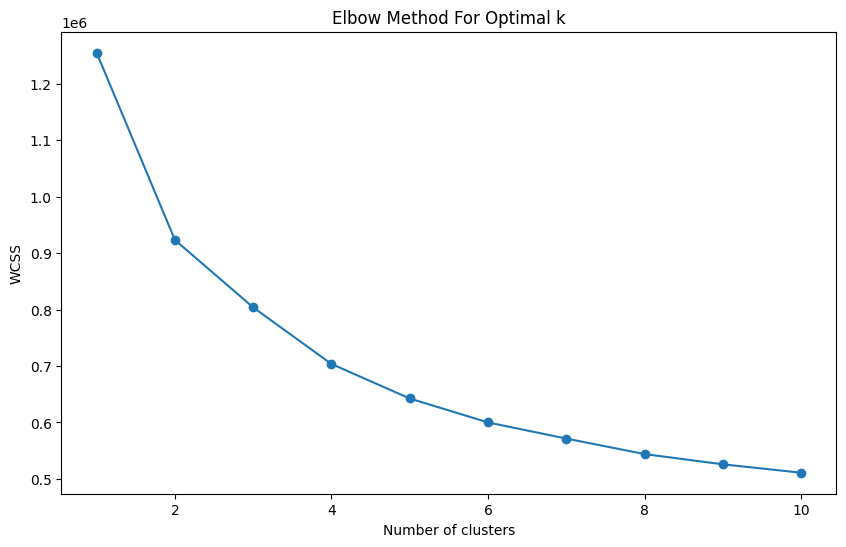

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_numeric_corrected)
    wcss.append(kmeans.inertia_)

#Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Find top 3 original variables that explain the most variance in the dataset to perform KMeans clustering in 3 dimensional space.

In [ ]:
#find top 3 original variables that explain the most variance in data
cov_matrix = np.cov(df_numeric_corrected, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

n_top_features = 3
top_feature_indices = np.abs(sorted_eigenvectors[:, :n_top_features]).argmax(axis=0)
top_features = df_numeric_corrected.columns[top_feature_indices]

print("Top Features Explaining the Most Variance:")
print(top_features)

Top Features Explaining the Most Variance:
Index(['Stops', 'Defensive_rating', 'offensive_rating'], dtype='object')


In [ ]:
#perform KMeans Clustering using k=4 according to the elbow plot above.
features = ['Stops', 'Defensive_rating', 'offensive_rating']

scaler = StandardScaler()
new_dataset_scaled = scaler.fit_transform(df_numeric_corrected[features])

np.random.seed(42)
initial_centroids_indices = np.random.choice(new_dataset_scaled.shape[0], size=4, replace=False)
initial_centroids = new_dataset_scaled[initial_centroids_indices]

kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1, random_state=42)
kmeans.fit(new_dataset_scaled)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

df_numeric_corrected['Cluster Labels'] = cluster_labels

According to dataset, there is one very large outlier (row 4090) in defensive rating which makes our clustering less visually comprehensible, so we will drop that outlier with the code below.

In [ ]:
#remove outlier in data to make clustering more comprehensible
outlier_index = df_numeric_corrected[df_numeric_corrected['Defensive_rating'] < -20].index

df_numeric_corrected = df_numeric_corrected.drop(outlier_index)

df_numeric_corrected.reset_index(drop=True, inplace=True)

In [ ]:
#plot kmeans clustering on top 3 original variables
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.scatter_3d(df_numeric_corrected, x = 'Stops', y = 'Defensive_rating', z = 'offensive_rating', color='Cluster Labels')
fig.update_traces(marker_size = 3)

In [ ]:
#perform same scoring to determine if better clustering based on drafted or not
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

true_labels = df_numeric_corrected['Pick_drafted_binary']

ari = adjusted_rand_score(true_labels, df_numeric_corrected['Cluster Labels'])

nmi = normalized_mutual_info_score(true_labels, df_numeric_corrected['Cluster Labels'])

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

Adjusted Rand Index (ARI): 0.01264326659864048
Normalized Mutual Information (NMI): 0.04697824862365447


Comparing these performance results for how well our clusters predict if a player is drafted, we can see that our PCA hierarchical clustering performed slightly better than the top 3 original variables in the KMeans clustering. We can conclude that there is not a clear seperation between what makes a player get drafted to the NBA or not when simply clustering based on all of our variables in the dataset.

In [ ]:
dfrp

,player_name,team,conference,games_played,min_per,offensive_rating,usage,effective_field_goal_%,true_shooting_%,offensive_rebound_%,...,Offensive_gbpm,Defensive_gbpm,Offensive_rebounds,Defensive_rebounds,Total_rebounds,Assists,Steals,Blocks,Points,Role/Position
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47913,DeAndre Dishman,Middle Tennessee,CUSA,1,0.0,200.0,20.0,100.0,100.00,0.0,...,118.545000,36.055000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,NaN
51356,Sammy Jones,Cal St. Fullerton,BW,1,0.0,203.2,20.0,100.0,101.69,0.0,...,117.609000,32.981200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,NaN
53087,AJ Martinka,Colorado,P12,1,0.2,0.0,0.0,0.0,0.00,0.0,...,5.292960,9.623910,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,NaN
56090,Michael Johnson,Chicago St.,WAC,19,21.9,55.0,16.4,24.5,30.60,0.6,...,-7.806150,-4.935520,0.0455,0.9091,0.9545,0.5909,0.4091,0.0000,2.4091,NaN


In [ ]:

dfrp['Pick_drafted_binary'] = dfrp['Pick_drafted'].apply(lambda x: 1 if x > 0 else 0)
dfrp['Pick_drafted_binary']

0        0
1        0
2        0
3        0
4        0
        ..
47913    0
51356    0
53087    0
56090    0
59476    0
Name: Pick_drafted_binary, Length: 4596, dtype: int64

Clustering based on how team and conferences relate to whether a players is pick_drafted

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

features = ['team', 'conference', 'Pick_drafted_binary']

categorical_features = ['team', 'conference']
numeric_features = ['Pick_drafted_binary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

new_dataset_scaled = preprocessor.fit_transform(dfrp).toarray()

np.random.seed(42)
initial_centroids_indices = np.random.choice(new_dataset_scaled.shape[0], size=4, replace=False)
initial_centroids = new_dataset_scaled[initial_centroids_indices]

kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1, random_state=42)
kmeans.fit(new_dataset_scaled)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

dfrp['Cluster Labels'] = cluster_labels


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.scatter_3d(dfrp, x = 'team', y = 'conference', z = 'Pick_drafted_binary', color='Cluster Labels')
fig.update_traces(marker_size = 3)